In [1]:
from __future__ import print_function, division
import os
import torch
import pandas as pd
import numpy as np
from skimage import io
from PIL import Image
from torch.utils.data import Dataset
from pathlib import Path
from scipy.interpolate import interp1d
from typing import Callable, Optional, Tuple, Union
import matplotlib.pyplot as plt
import time
import scipy.fftpack
from scipy.signal import savgol_filter
# Ignore warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
abnormal_data_idx = [2,10,13,24,25,34,39,52,54,60,63,67,68,70,71,75,76,80,86,87,28,79,84]

In [3]:
abnormal_list = [
'/Users/honghaoliu/Dropbox/preprocessed/subj2_single_m.npy',
'/Users/honghaoliu/Dropbox/preprocessed/subj10_single_m.npy',
'/Users/honghaoliu/Dropbox/preprocessed/subj13_single_m.npy',
'/Users/honghaoliu/Dropbox/preprocessed/subj24_single_m.npy',
'/Users/honghaoliu/Dropbox/preprocessed/subj25_single_m.npy',
'/Users/honghaoliu/Dropbox/preprocessed/subj34_single_m.npy',
'/Users/honghaoliu/Dropbox/preprocessed/subj39_single_m.npy',
'/Users/honghaoliu/Dropbox/preprocessed/subj52_single_m.npy',
'/Users/honghaoliu/Dropbox/preprocessed/subj54_single_m.npy',
'/Users/honghaoliu/Dropbox/preprocessed/subj60_single_m.npy',
'/Users/honghaoliu/Dropbox/preprocessed/subj63_single_m.npy',
'/Users/honghaoliu/Dropbox/preprocessed/subj67_single_m.npy',
'/Users/honghaoliu/Dropbox/preprocessed/subj68_single_m.npy',
'/Users/honghaoliu/Dropbox/preprocessed/subj70_single_m.npy',
'/Users/honghaoliu/Dropbox/preprocessed/subj71_single_m.npy',
'/Users/honghaoliu/Dropbox/preprocessed/subj75_single_m.npy',
'/Users/honghaoliu/Dropbox/preprocessed/subj76_single_m.npy',
'/Users/honghaoliu/Dropbox/preprocessed/subj80_single_m.npy',
'/Users/honghaoliu/Dropbox/preprocessed/subj86_single_m.npy',
'/Users/honghaoliu/Dropbox/preprocessed/subj87_single_m.npy',
'/Users/honghaoliu/Dropbox/preprocessed/subj28_single_m.npy',
'/Users/honghaoliu/Dropbox/preprocessed/subj79_single_m.npy',
'/Users/honghaoliu/Dropbox/preprocessed/subj84_single_m.npy',
'/Users/honghaoliu/Dropbox/preprocessed/subj2_single_f.npy',
'/Users/honghaoliu/Dropbox/preprocessed/subj10_single_f.npy',
'/Users/honghaoliu/Dropbox/preprocessed/subj13_single_f.npy',
'/Users/honghaoliu/Dropbox/preprocessed/subj24_single_f.npy',
'/Users/honghaoliu/Dropbox/preprocessed/subj25_single_f.npy',
'/Users/honghaoliu/Dropbox/preprocessed/subj34_single_f.npy',
'/Users/honghaoliu/Dropbox/preprocessed/subj39_single_f.npy',
'/Users/honghaoliu/Dropbox/preprocessed/subj52_single_f.npy',
'/Users/honghaoliu/Dropbox/preprocessed/subj54_single_f.npy',
'/Users/honghaoliu/Dropbox/preprocessed/subj60_single_f.npy',
'/Users/honghaoliu/Dropbox/preprocessed/subj63_single_f.npy',
'/Users/honghaoliu/Dropbox/preprocessed/subj67_single_f.npy',
'/Users/honghaoliu/Dropbox/preprocessed/subj68_single_f.npy',
'/Users/honghaoliu/Dropbox/preprocessed/subj70_single_f.npy',
'/Users/honghaoliu/Dropbox/preprocessed/subj71_single_f.npy',
'/Users/honghaoliu/Dropbox/preprocessed/subj75_single_f.npy',
'/Users/honghaoliu/Dropbox/preprocessed/subj76_single_f.npy',
'/Users/honghaoliu/Dropbox/preprocessed/subj80_single_f.npy',
'/Users/honghaoliu/Dropbox/preprocessed/subj86_single_f.npy',
'/Users/honghaoliu/Dropbox/preprocessed/subj87_single_f.npy',
'/Users/honghaoliu/Dropbox/preprocessed/subj28_single_f.npy',
'/Users/honghaoliu/Dropbox/preprocessed/subj79_single_f.npy',
'/Users/honghaoliu/Dropbox/preprocessed/subj84_single_f.npy',

'/Users/honghaoliu/Dropbox/preprocessed/subj2_mixed_m.npy',
'/Users/honghaoliu/Dropbox/preprocessed/subj10_mixed_m.npy',
'/Users/honghaoliu/Dropbox/preprocessed/subj13_mixed_m.npy',
'/Users/honghaoliu/Dropbox/preprocessed/subj24_mixed_m.npy',
'/Users/honghaoliu/Dropbox/preprocessed/subj25_mixed_m.npy',
'/Users/honghaoliu/Dropbox/preprocessed/subj34_mixed_m.npy',
'/Users/honghaoliu/Dropbox/preprocessed/subj39_mixed_m.npy',
'/Users/honghaoliu/Dropbox/preprocessed/subj52_mixed_m.npy',
'/Users/honghaoliu/Dropbox/preprocessed/subj54_mixed_m.npy',
'/Users/honghaoliu/Dropbox/preprocessed/subj60_mixed_m.npy',
'/Users/honghaoliu/Dropbox/preprocessed/subj63_mixed_m.npy',
'/Users/honghaoliu/Dropbox/preprocessed/subj67_mixed_m.npy',
'/Users/honghaoliu/Dropbox/preprocessed/subj68_mixed_m.npy',
'/Users/honghaoliu/Dropbox/preprocessed/subj70_mixed_m.npy',
'/Users/honghaoliu/Dropbox/preprocessed/subj71_mixed_m.npy',
'/Users/honghaoliu/Dropbox/preprocessed/subj75_mixed_m.npy',
'/Users/honghaoliu/Dropbox/preprocessed/subj76_mixed_m.npy',
'/Users/honghaoliu/Dropbox/preprocessed/subj80_mixed_m.npy',
'/Users/honghaoliu/Dropbox/preprocessed/subj86_mixed_m.npy',
'/Users/honghaoliu/Dropbox/preprocessed/subj87_mixed_m.npy',
'/Users/honghaoliu/Dropbox/preprocessed/subj28_mixed_m.npy',
'/Users/honghaoliu/Dropbox/preprocessed/subj79_mixed_m.npy',
'/Users/honghaoliu/Dropbox/preprocessed/subj84_mixed_m.npy',
'/Users/honghaoliu/Dropbox/preprocessed/subj2_mixed_f.npy',
'/Users/honghaoliu/Dropbox/preprocessed/subj10_mixed_f.npy',
'/Users/honghaoliu/Dropbox/preprocessed/subj13_mixed_f.npy',
'/Users/honghaoliu/Dropbox/preprocessed/subj24_mixed_f.npy',
'/Users/honghaoliu/Dropbox/preprocessed/subj25_mixed_f.npy',
'/Users/honghaoliu/Dropbox/preprocessed/subj34_mixed_f.npy',
'/Users/honghaoliu/Dropbox/preprocessed/subj39_mixed_f.npy',
'/Users/honghaoliu/Dropbox/preprocessed/subj52_mixed_f.npy',
'/Users/honghaoliu/Dropbox/preprocessed/subj54_mixed_f.npy',
'/Users/honghaoliu/Dropbox/preprocessed/subj60_mixed_f.npy',
'/Users/honghaoliu/Dropbox/preprocessed/subj63_mixed_f.npy',
'/Users/honghaoliu/Dropbox/preprocessed/subj67_mixed_f.npy',
'/Users/honghaoliu/Dropbox/preprocessed/subj68_mixed_f.npy',
'/Users/honghaoliu/Dropbox/preprocessed/subj70_mixed_f.npy',
'/Users/honghaoliu/Dropbox/preprocessed/subj71_mixed_f.npy',
'/Users/honghaoliu/Dropbox/preprocessed/subj75_mixed_f.npy',
'/Users/honghaoliu/Dropbox/preprocessed/subj76_mixed_f.npy',
'/Users/honghaoliu/Dropbox/preprocessed/subj80_mixed_f.npy',
'/Users/honghaoliu/Dropbox/preprocessed/subj86_mixed_f.npy',
'/Users/honghaoliu/Dropbox/preprocessed/subj87_mixed_f.npy',
'/Users/honghaoliu/Dropbox/preprocessed/subj28_mixed_f.npy',
'/Users/honghaoliu/Dropbox/preprocessed/subj79_mixed_f.npy',
'/Users/honghaoliu/Dropbox/preprocessed/subj84_mixed_f.npy'
]

In [4]:
def remove_bad_data_paths(indices, root_path, input_paths):
    for i in indices:
        root_path + 'sub' + str(i) +'_mixed_f.npy'

In [5]:
class eeg_pretrain_dataset(Dataset):
    def __init__(self, path='./data/eeg_data/'):
        super(eeg_pretrain_dataset, self).__init__()
        data = []
        images = []
        ## get input path/ data arrays
        self.input_paths = [str(f) for f in sorted(Path(path).rglob('*')) if is_npy_ext(f) and os.path.isfile(f)]
        
        ## remove bad data path from input_path
        
        for item in abnormal_list:
            
            if item in self.input_paths:
                self.input_paths.remove(item)
        print('/Users/honghaoliu/Dropbox/preprocessed/subj68_mixed_f.npy' in self.input_paths)
#         self.input_paths.remove('/Users/honghaoliu/Dropbox/preprocessed/subj68_mixed_f.npy')
        #         print(self.input_paths)
        ## 68 mixed female skip
        ## '/Users/honghaoliu/Dropbox/preprocessed/subj68_single_m.npy'
        ### !!!!!!!!!
#         print(self.input_paths)
        print(len(self.input_paths))
        assert len(self.input_paths) != 0, 'No data found'
        ### length and channels
        self.data_len  = 512
        self.data_chan = 128

        self.win_size = 512
        self.hop_size = 512
        self.num_pitchs = (60000 - self.win_size) // self.hop_size + 1
        print(self.num_pitchs)
    
    def get_paths(self):
        return self.input_paths

    def __len__(self):
        return len(self.input_paths)*self.num_pitchs
    
    def __getitem__(self, index):
        eeg_idx = index // self.num_pitchs
        inner_idx = index - eeg_idx * self.num_pitchs
        data_path = self.input_paths[eeg_idx]

        # print(index,eeg_idx)
#         data_path = '/Users/honghaoliu/Dropbox/preprocessed/subj52_mixed_m.npy'
        eeg_data = np.load(data_path)
        # print(inner_idx)
        # print(eeg_data.shape)
        start_loc = inner_idx * self.hop_size
        data = eeg_data[:,start_loc:(start_loc+self.win_size)]
        # print(data.shape)
        if data.shape[-1] > self.data_len: 
            idx = np.random.randint(0, int(data.shape[-1] - self.data_len)+1)

            data = data[:, idx: idx+self.data_len]
        else: # interp1d
            x = np.linspace(0, 1, data.shape[-1])
            x2 = np.linspace(0, 1, self.data_len)
            f = interp1d(x, data)
            data = f(x2)
        ret = np.zeros((self.data_chan, self.data_len))
        if (self.data_chan > data.shape[-2]): # replicate
            for i in range((self.data_chan//data.shape[-2])):

                ret[i * data.shape[-2]: (i+1) * data.shape[-2], :] = data
            if self.data_chan % data.shape[-2] != 0:

                ret[ -(self.data_chan%data.shape[-2]):, :] = data[: (self.data_chan%data.shape[-2]), :]
        elif(self.data_chan < data.shape[-2]):
            idx2 = np.random.randint(0, int(data.shape[-2] - self.data_chan)+1)
            ret = data[idx2: idx2+self.data_chan, :]
        # print(ret.shape)
        elif(self.data_chan == data.shape[-2]):
            ret = data
        ret = ret/10 # reduce an order
        # torch.tensor()
        ret = torch.from_numpy(ret).float()
        return {'eeg': ret } #,

In [6]:
def file_ext(name: Union[str, Path]) -> str:
    return str(name).split('.')[-1]

def is_npy_ext(fname: Union[str, Path]) -> bool:
    ext = file_ext(fname).lower()
    return f'{ext}' == 'npy'# type: ignore

In [7]:
data_path = "/Users/honghaoliu/Dropbox/preprocessed"
# data_path = "/Users/honghaoliu/Documents/GitHub/BISR/code/BISS/data/eeg_data"
dataset_pretrain = eeg_pretrain_dataset(path=data_path)

False
278
117


## great data
'/Users/honghaoliu/Dropbox/preprocessed/subj26_single_m.npy'
'/Users/honghaoliu/Dropbox/preprocessed/subj29_single_m.npy'
'/Users/honghaoliu/Dropbox/preprocessed/subj31_single_m.npy'
'/Users/honghaoliu/Dropbox/preprocessed/subj36_single_m.npy'
'/Users/honghaoliu/Dropbox/preprocessed/subj42_single_m.npy'
'/Users/honghaoliu/Dropbox/preprocessed/subj91_single_m.npy'
'/Users/honghaoliu/Dropbox/preprocessed/subj93_single_m.npy'
'/Users/honghaoliu/Dropbox/preprocessed/subj100_single_m.npy'
## less
'/Users/honghaoliu/Dropbox/preprocessed/subj35_single_m.npy'
'/Users/honghaoliu/Dropbox/preprocessed/subj37_single_m.npy'
 '/Users/honghaoliu/Dropbox/preprocessed/subj38_single_m.npy'
 '/Users/honghaoliu/Dropbox/preprocessed/subj88_single_m.npy'

## normal data 1st channel
/Users/honghaoliu/Dropbox/preprocessed/subj1_single_m.npy'
/Users/honghaoliu/Dropbox/preprocessed/subj4_single_m.npy'

## abnormal data
/Users/honghaoliu/Dropbox/preprocessed/subj2_single_m.npy'
'/Users/honghaoliu/Dropbox/preprocessed/subj10_single_m.npy'
'/Users/honghaoliu/Dropbox/preprocessed/subj13_single_m.npy'
'/Users/honghaoliu/Dropbox/preprocessed/subj24_single_m.npy'
'/Users/honghaoliu/Dropbox/preprocessed/subj25_single_m.npy'
'/Users/honghaoliu/Dropbox/preprocessed/subj34_single_m.npy'
'/Users/honghaoliu/Dropbox/preprocessed/subj39_single_m.npy'
'/Users/honghaoliu/Dropbox/preprocessed/subj52_single_m.npy'
'/Users/honghaoliu/Dropbox/preprocessed/subj54_single_m.npy'
'/Users/honghaoliu/Dropbox/preprocessed/subj60_single_m.npy'
'/Users/honghaoliu/Dropbox/preprocessed/subj63_single_m.npy'
'/Users/honghaoliu/Dropbox/preprocessed/subj67_single_m.npy'
'/Users/honghaoliu/Dropbox/preprocessed/subj68_single_m.npy'
'/Users/honghaoliu/Dropbox/preprocessed/subj70_single_m.npy'
'/Users/honghaoliu/Dropbox/preprocessed/subj71_single_m.npy'
'/Users/honghaoliu/Dropbox/preprocessed/subj76_single_m.npy'
'/Users/honghaoliu/Dropbox/preprocessed/subj80_single_m.npy'
'/Users/honghaoliu/Dropbox/preprocessed/subj86_single_m.npy'
'/Users/honghaoliu/Dropbox/preprocessed/subj87_single_m.npy'
## several channel
'/Users/honghaoliu/Dropbox/preprocessed/subj28_single_m.npy'

## too noisy
'/Users/honghaoliu/Dropbox/preprocessed/subj79_single_m.npy'
'/Users/honghaoliu/Dropbox/preprocessed/subj84_single_m.npy'

In [8]:
sample = dataset_pretrain[0]['eeg']

In [9]:
x_axis = np.arange(0, sample.shape[-1])

In [10]:
sample = dataset_pretrain[100]['eeg']
sample = sample.to('cpu').squeeze(0)
sample.shape

torch.Size([128, 512])

In [80]:
278*117

32526

In [ ]:
3286

In [11]:
def smooth_signal(signal, weight_threshold=100, keep_ratio=0.05, savgol=True, win=7, poly=1):
    x_axis = np.arange(0, sample.shape[-1])
    # to frequent domain
    w = scipy.fftpack.rfft(signal)
    f = scipy.fftpack.rfftfreq(signal.shape[-1], x_axis[1]-x_axis[0])
    spectrum = w**2
    # remove f with small value
    cutoff_idx = spectrum < (spectrum.max()/weight_threshold)
    if (cutoff_idx.sum() / len(cutoff_idx)) > (1-keep_ratio):
        idx = int((1-keep_ratio)*sample.shape[-1])
        cutoff_idx = spectrum < np.sort(spectrum)[idx]
#     print(cutoff_idx.sum(),len(cutoff_idx))
    w2 = w.copy()
    w2[cutoff_idx] = 0
    
    s_smooth = scipy.fftpack.irfft(w2)
#     plt.plot(x_axis, s_smooth)
#     plt.show()
    # Savitzky-Golay filter
    if savgol:
        smooth = savgol_filter(s_smooth, win, poly, mode='nearest')
    plt.plot(x_axis, smooth)
    plt.show()
    
    return s_smooth

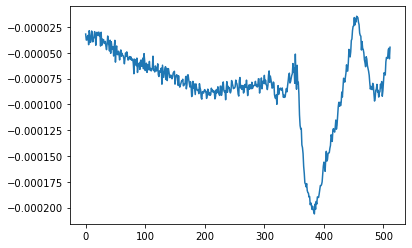

In [52]:
sample = dataset_pretrain[1]['eeg'].numpy()
x_axis = np.arange(0, sample.shape[-1])
# sample = sample.to('cpu').squeeze(0)[1].numpy()
fig = plt.figure()
plt.plot(x_axis, sample[24])
plt.show()
# time.sleep(2)

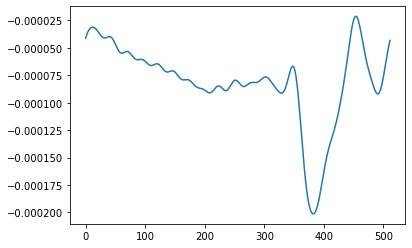

In [56]:
plt.plot(x_axis, sample[24])

512


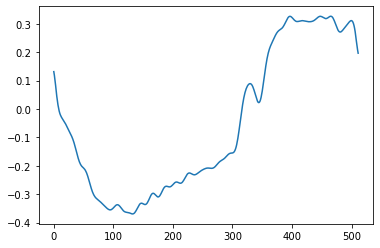

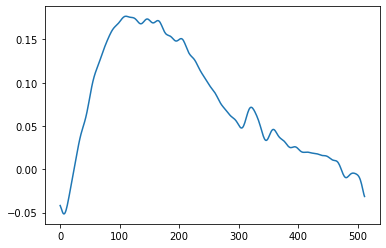

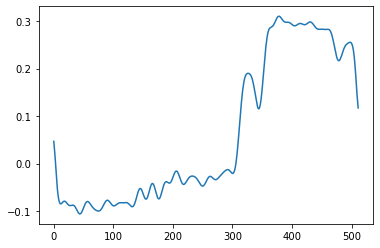

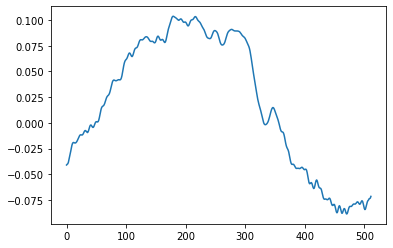

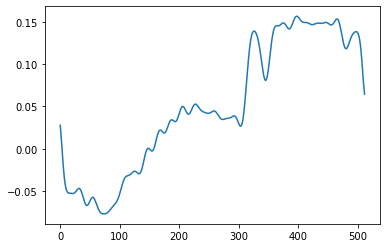

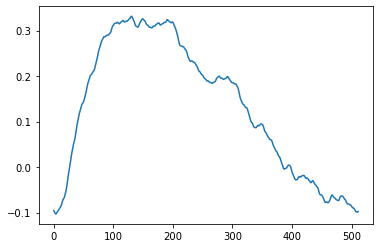

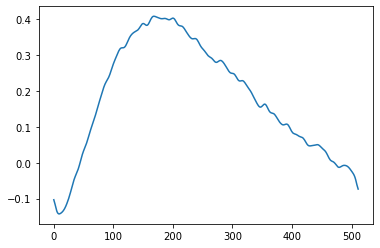

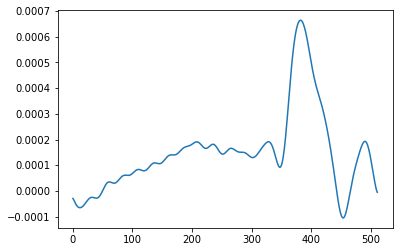

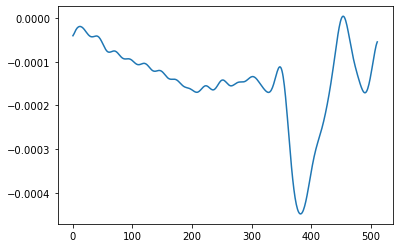

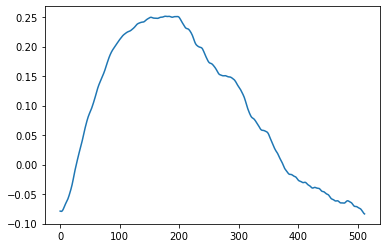

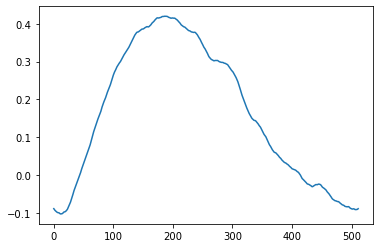

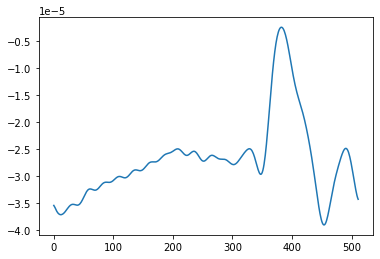

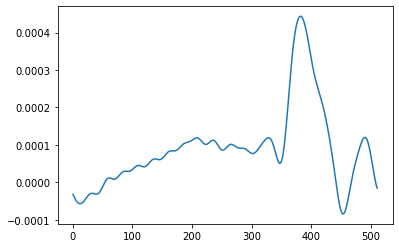

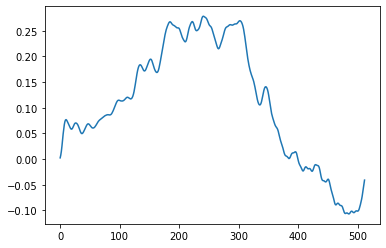

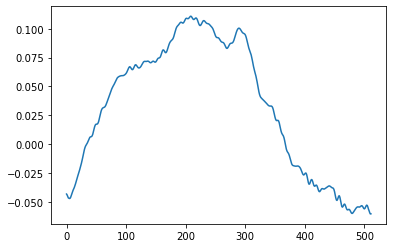

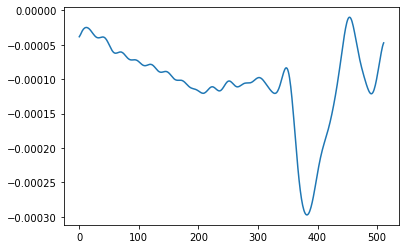

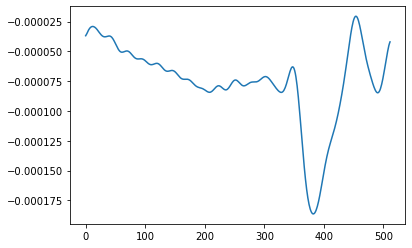

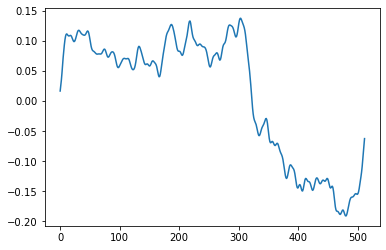

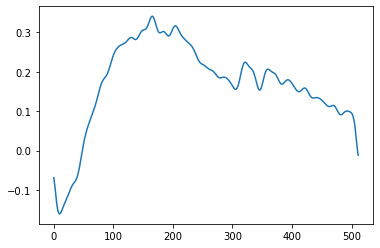

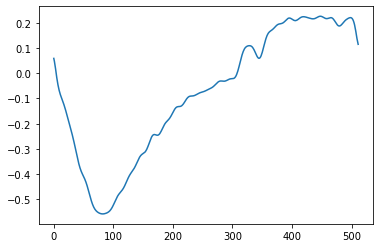

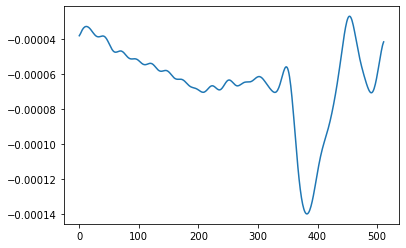

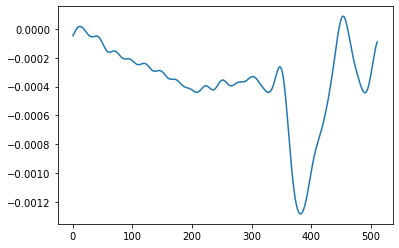

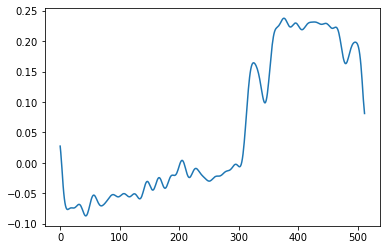

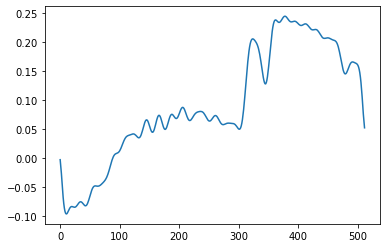

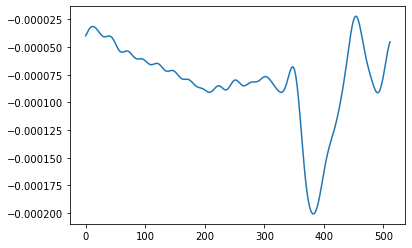

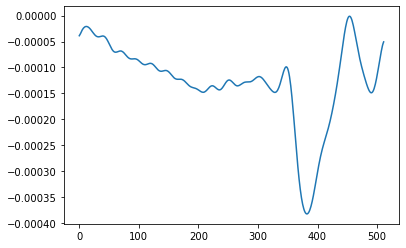

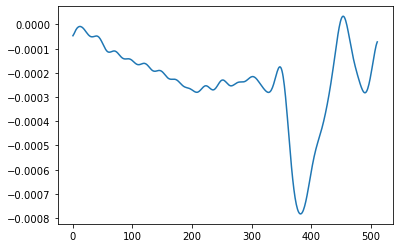

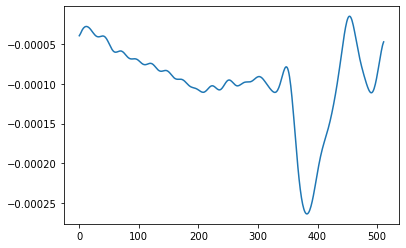

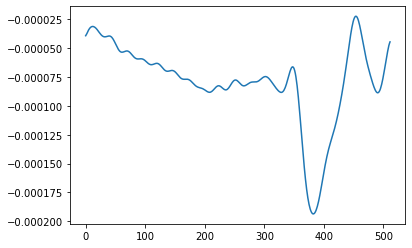

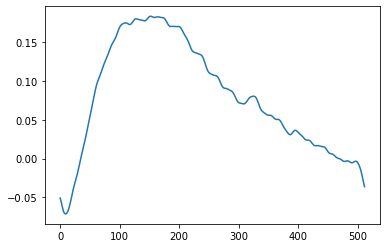

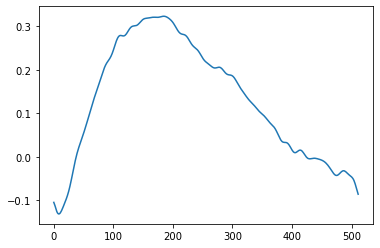

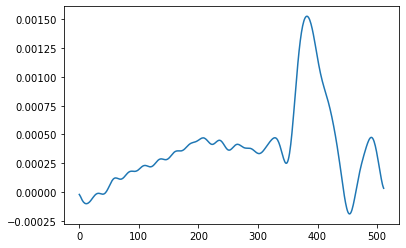

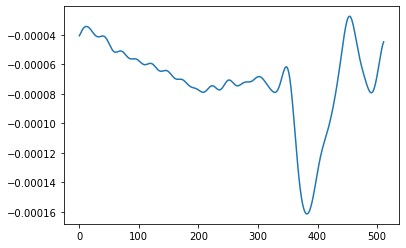

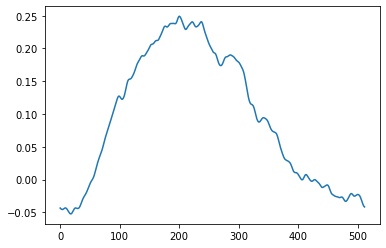

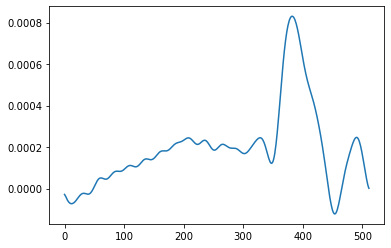

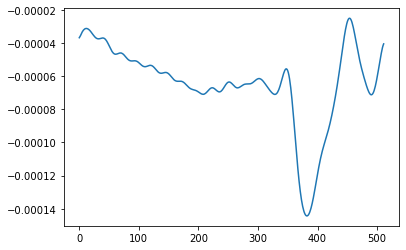

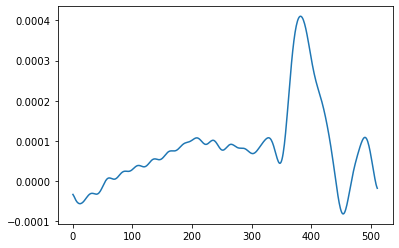

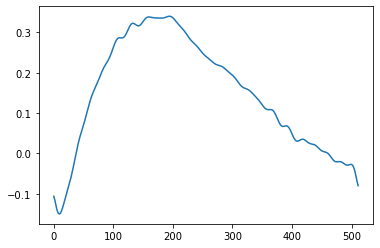

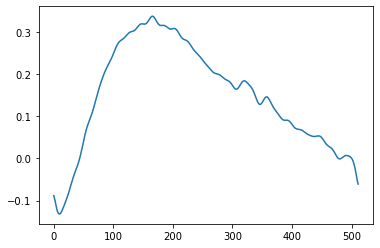

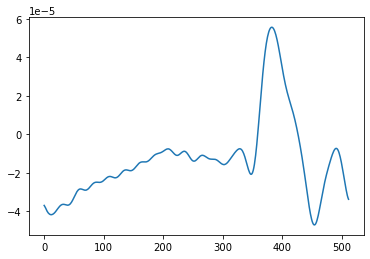

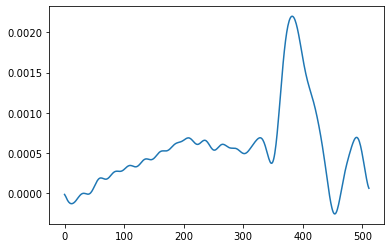

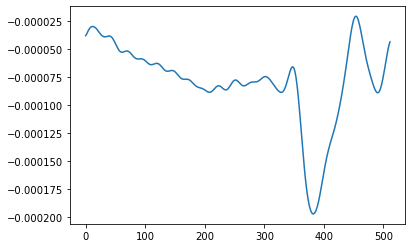

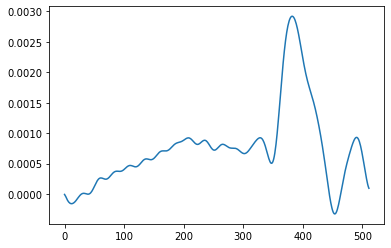

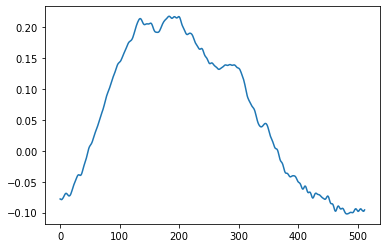

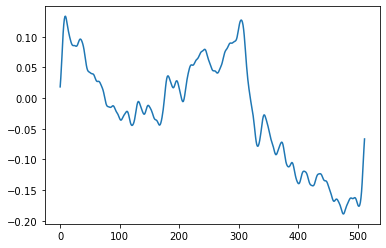

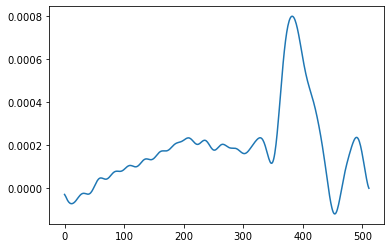

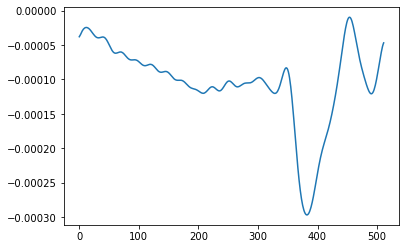

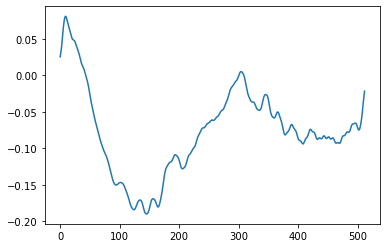

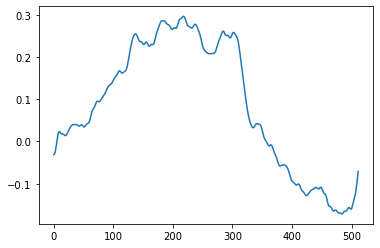

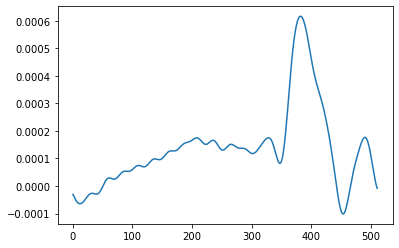

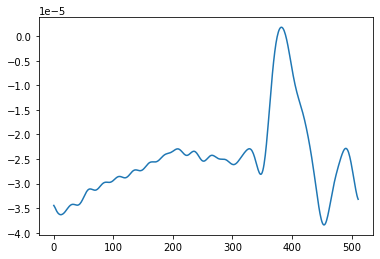

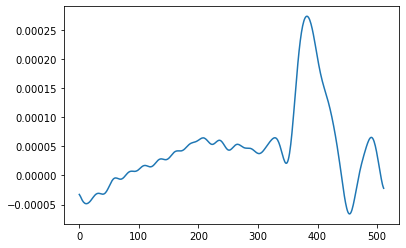

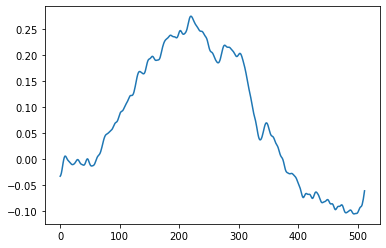

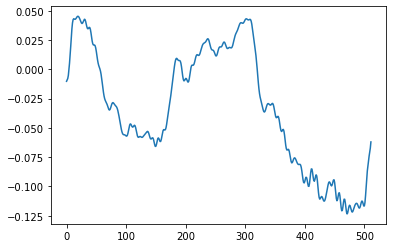

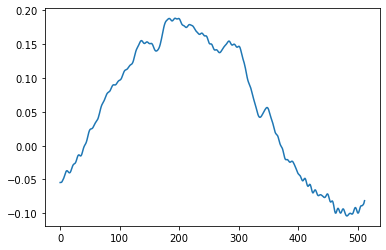

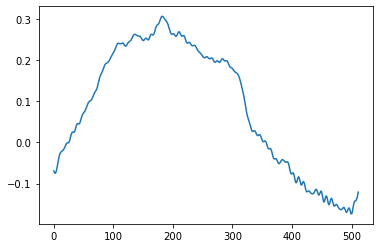

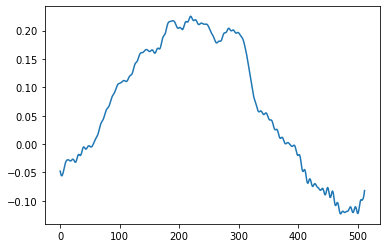

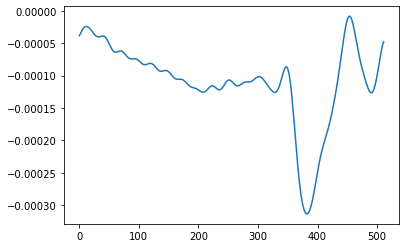

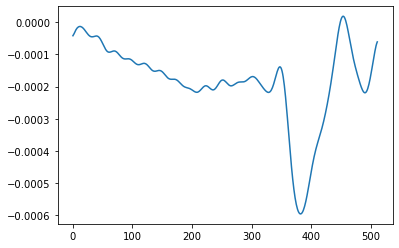

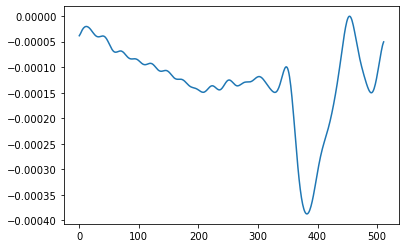

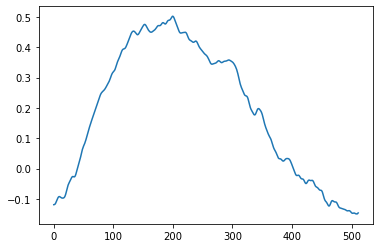

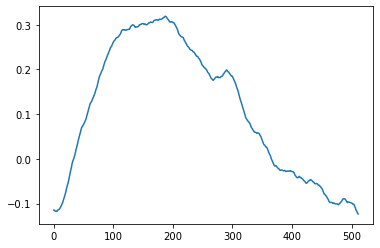

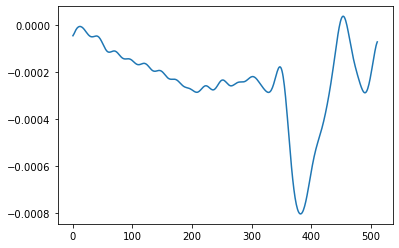

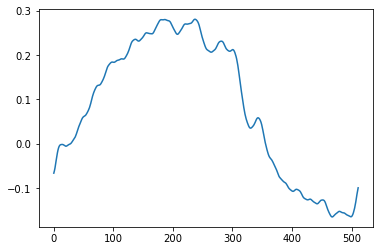

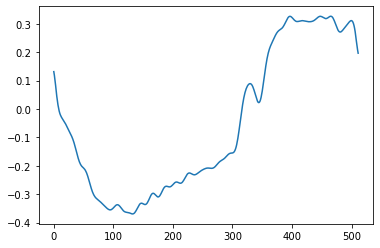

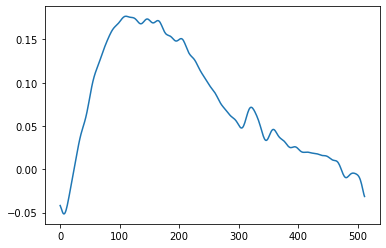

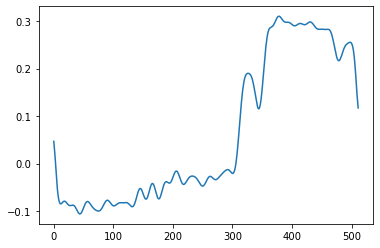

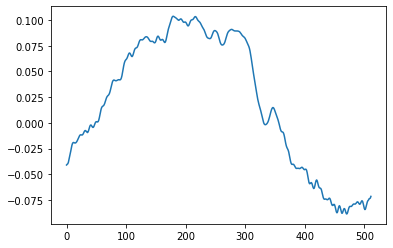

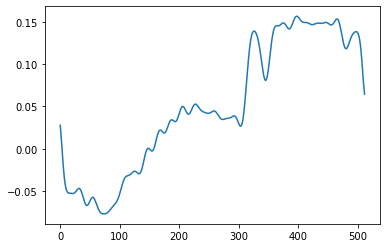

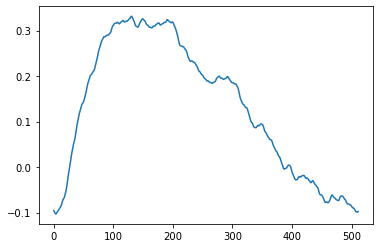

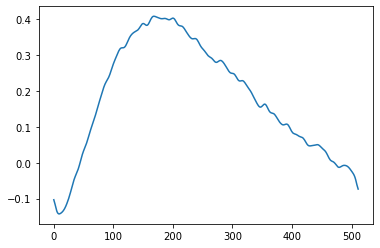

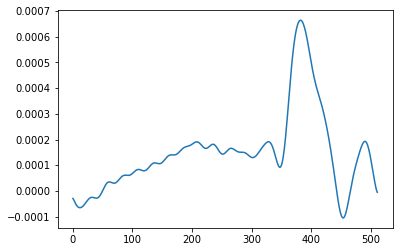

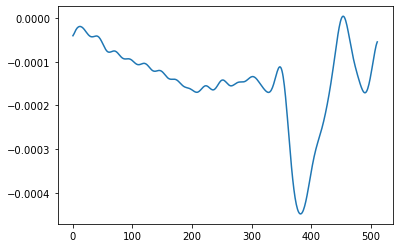

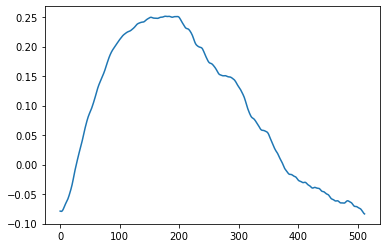

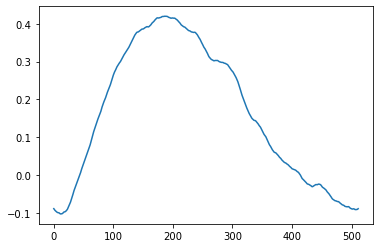

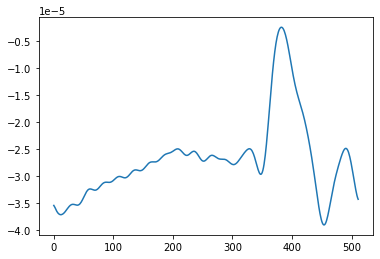

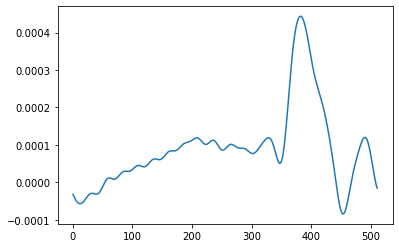

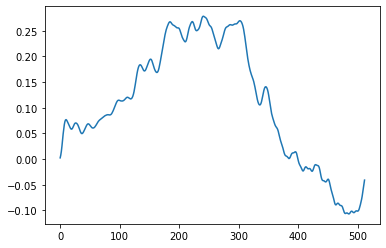

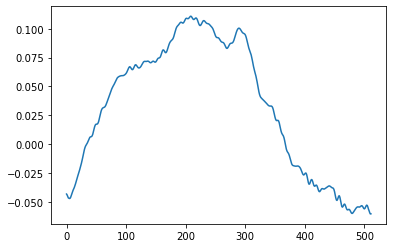

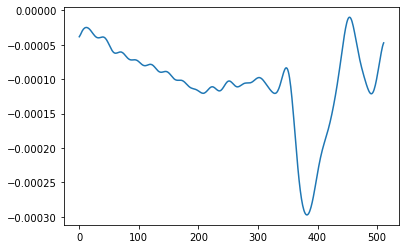

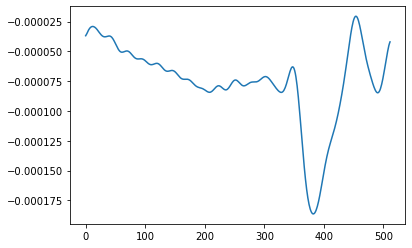

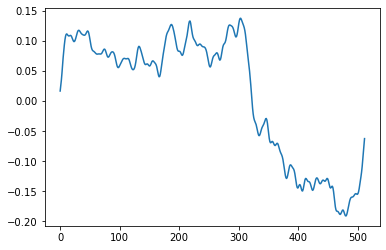

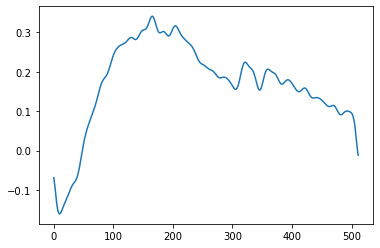

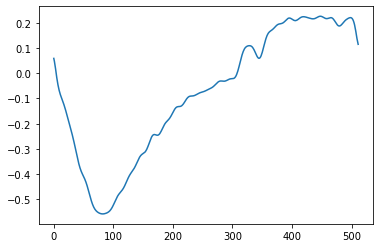

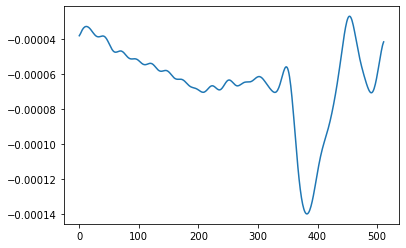

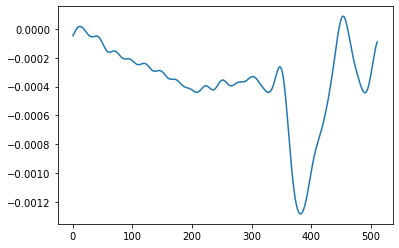

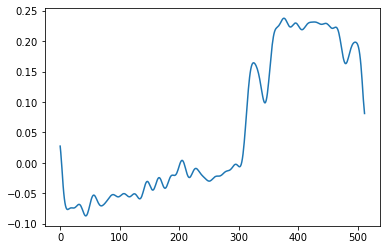

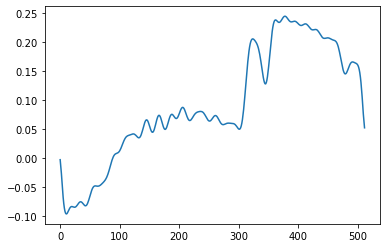

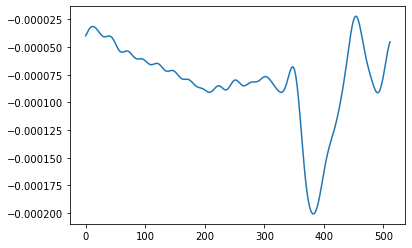

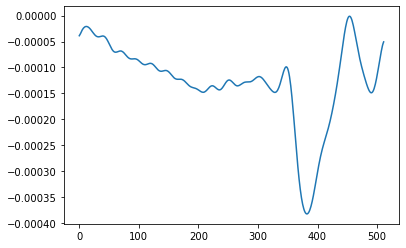

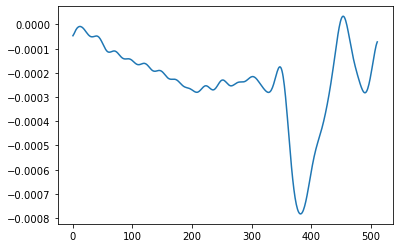

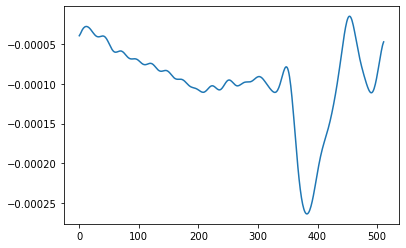

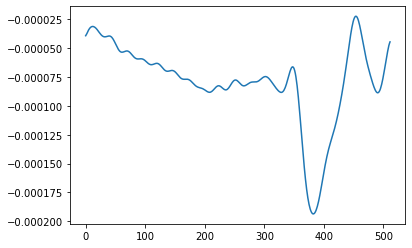

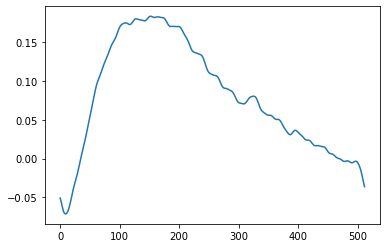

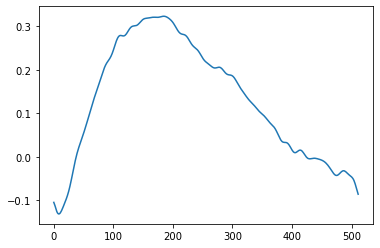

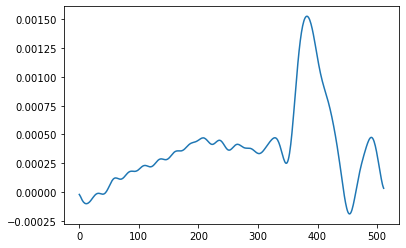

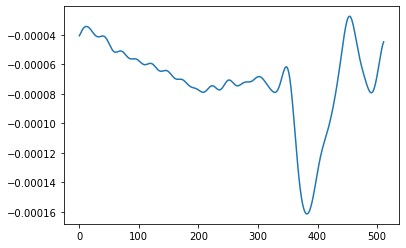

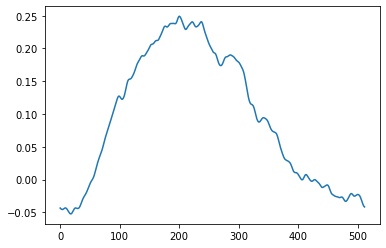

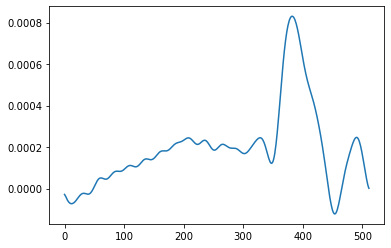

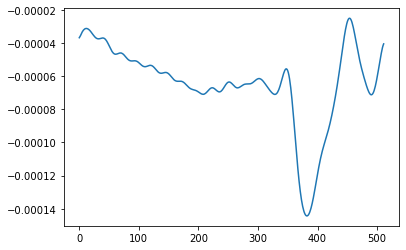

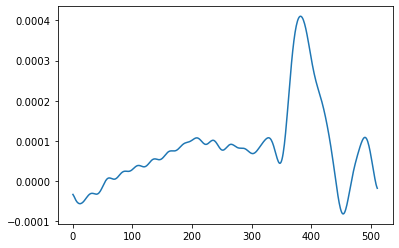

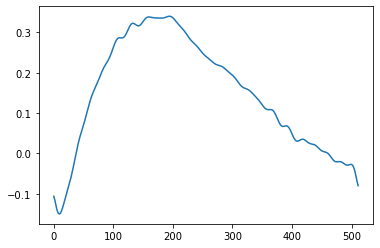

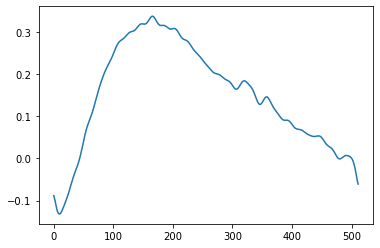

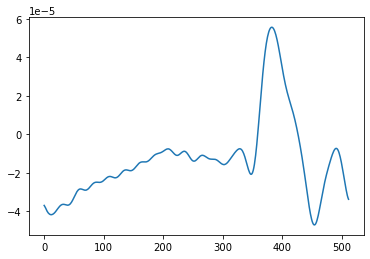

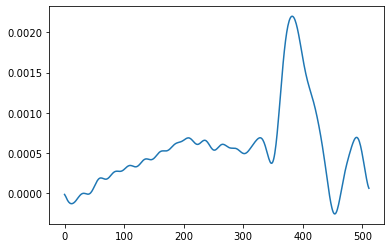

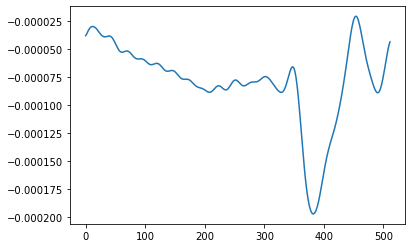

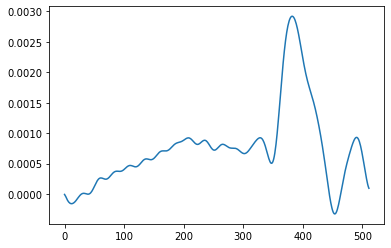

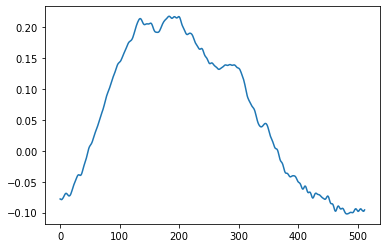

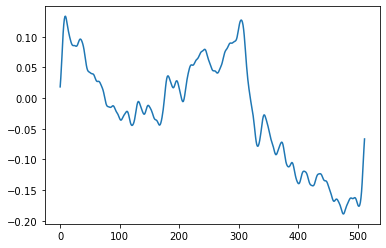

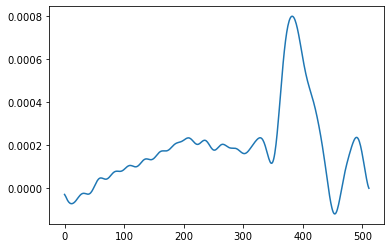

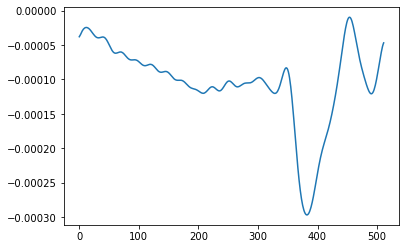

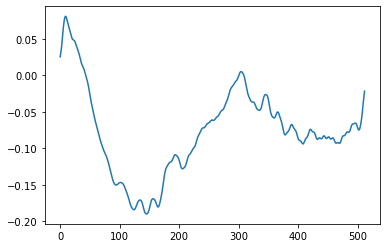

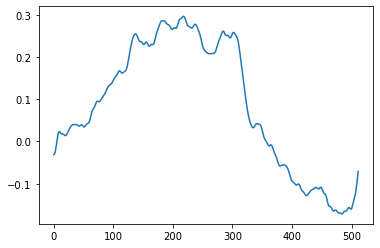

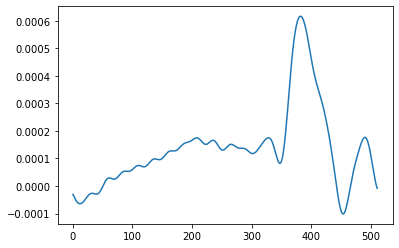

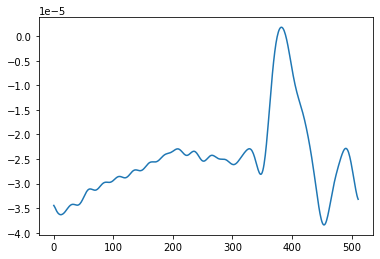

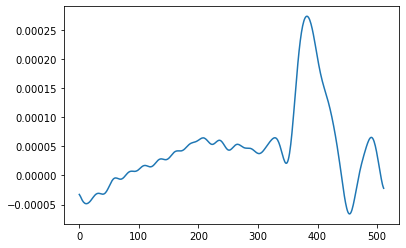

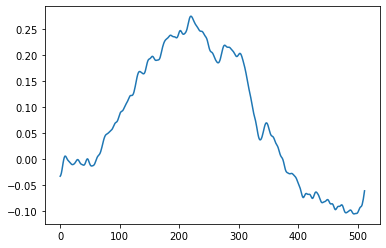

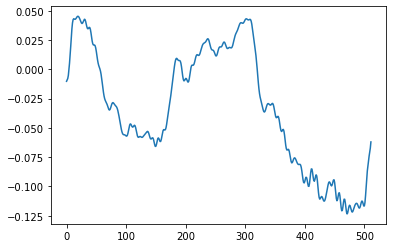

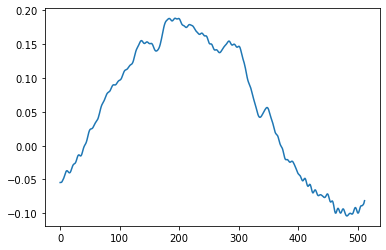

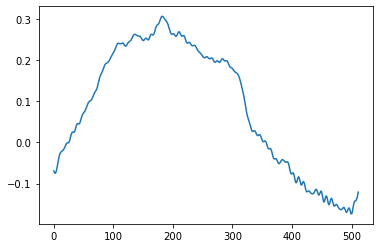

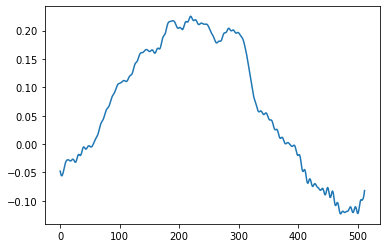

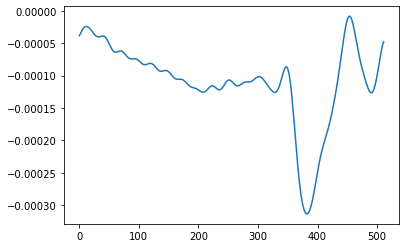

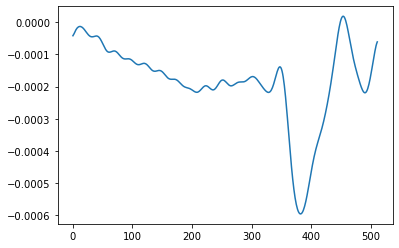

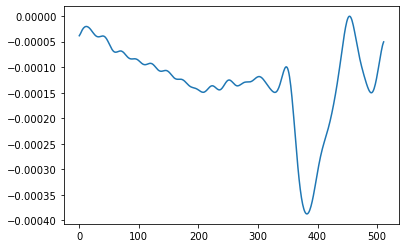

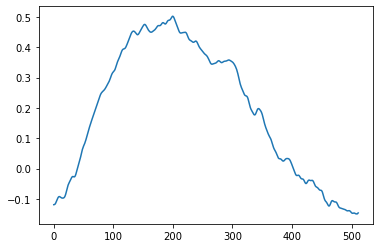

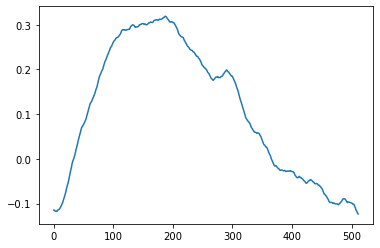

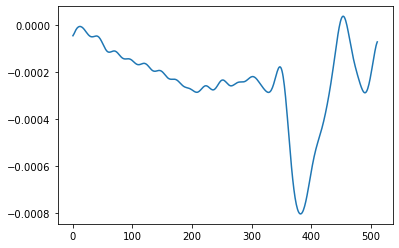

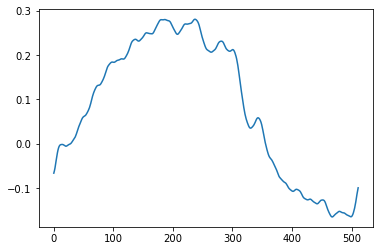

In [53]:
print(sample.shape[-1])
for i in range(sample.shape[-2]):
    sample[i] = smooth_signal(sample[i])


In [199]:
import scipy.fftpack
# to frequency domain
w = scipy.fftpack.rfft(sample)
f = scipy.fftpack.rfftfreq(sample.shape[-1], x_axis[1]-x_axis[0])
spectrum = w**2
# spectrum.sort()
# remove f with small value
cutoff_idx = spectrum < (spectrum.max()/100)
print(cutoff_idx.sum(),len(cutoff_idx))
w2 = w.copy()
w2[cutoff_idx] = 0

y2 = scipy.fftpack.irfft(w2)

503 512


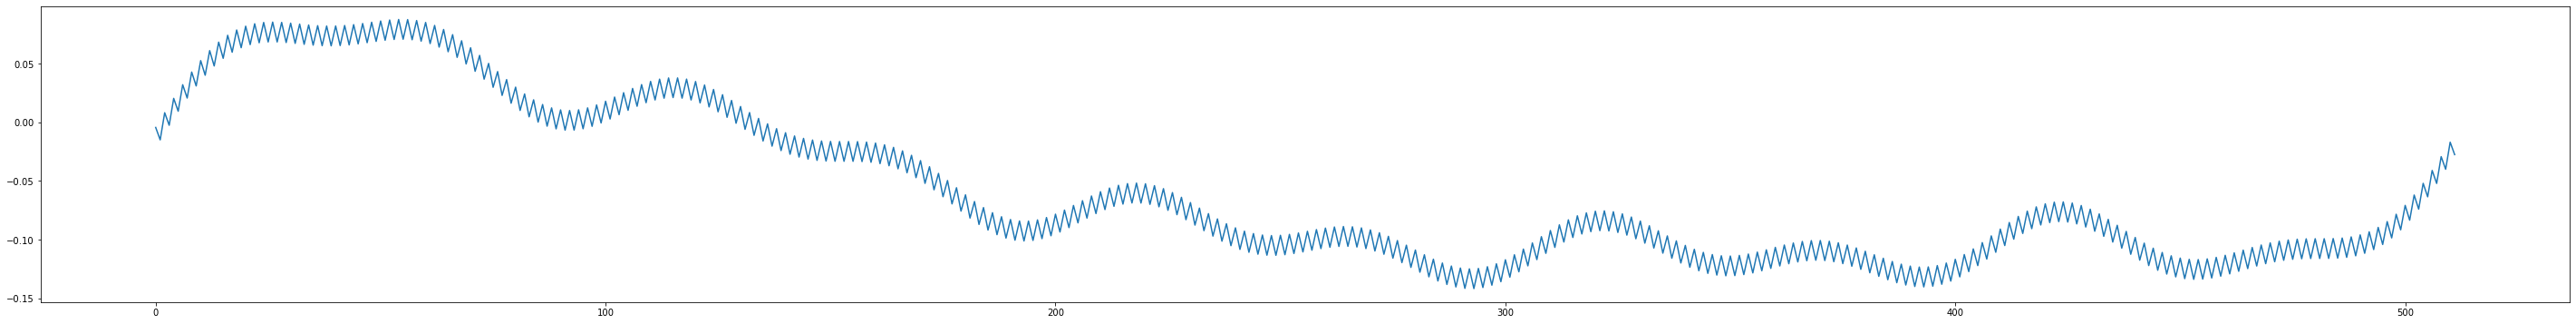

In [201]:
plt.figure(figsize=(50,6))
plt.plot(x_axis, y2)

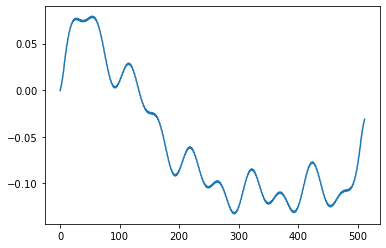

In [198]:
from scipy.signal import savgol_filter
sample_smooth = savgol_filter(y2, 11, 1, mode='nearest')
# print(signaltonoise(sample_smooth))
plt.plot(x_axis,sample_smooth)

In [15]:
def signaltonoise(a, axis=0, ddof=0):
    a = np.asanyarray(a)
    m = a.mean(axis)
    sd = a.std(axis=axis, ddof=ddof)
    return np.where(sd == 0, 0, m/sd)

In [18]:
sample.std()

0.0773895

In [17]:
signaltonoise(sample)

array(-0.73708111)

In [ ]:
for i in range(0,32526,100):
#     try:
    sample = dataset_pretrain[i]['eeg']
    x_axis = np.arange(0, sample.shape[-1])
    channel_id = random.randint(0, 64)
    sample = sample.to('cpu').squeeze(0)[channel_id].numpy()
    fig = plt.figure()
    plt.plot(x_axis, sample)
    plt.show()
    print(i)

In [ ]:
def compute_similarity(ref_rec,input_rec,weightage=[0.33,0.33,0.33]):
    ## Time domain similarity
    ref_time = np.correlate(ref_rec,ref_rec)
    inp_time = np.correlate(ref_rec,input_rec)
    diff_time = abs(ref_time-inp_time)
    
    ## Freq domain similarity
    ref_freq = np.correlate(np.fft.fft(ref_rec),np.fft.fft(ref_rec)) 
    inp_freq = np.correlate(np.fft.fft(ref_rec),np.fft.fft(input_rec))
    diff_freq = abs(ref_freq-inp_freq)
    
    ## Power similarity
    ref_power = np.sum(ref_rec**2)
    inp_power = np.sum(input_rec**2)
    diff_power = abs(ref_power-inp_power)
    
    return float(weightage[0]*diff_time+weightage[1]*diff_freq+weightage[2]*diff_power)